# Build the Machine Learning project
1. Big picture

2. Get the data

3. Explore and visualize the data to gain insights

4. Prepare the data for ML algorithms

5. Select a model and train it

6. Fine-tune model

7. Prepresent solution

## 1. Looking at the big picture
#### What exactly the business objective is?
How does the company expect to use and benefit from this model? Knowing the objective to frame and determine the problem, which the algorithm to select and which performance to use to evaluate the model, and how effort to tweaking it

Next question, What the current solution look like? The current solution to give us a reference for performance, as well as insights on how to solve the problem. 

Which all this information, we determine what kind of training supervision the model

- Is it supervised, unsupervised, semi-supervised, self-supervised, or Reinforcement learning?
- Is it a classification task, regression task, or something else?

#### Select a Performance Measure
The performance measure for regression problem is RMSE. If there are many outlier data points, we can consider using the MAE (mean absolute error) 

## 2. Get the data

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
## download data from internet
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import time

def load_housing_data():
    tarball_path = Path('datasets/housing.tgz')
    dl_wait = True
    if not tarball_path.is_file():
        Path('datasets').mkdir(parents=True, exist_ok=True)
        url = "https://github.com/chuongnet/mltf03/blob/1f306e2fddcbe060221e500b3a80f17f3005ab1e/datasets/housing.tgz?raw=true"
        urllib.request.urlretrieve(url, tarball_path)
        while dl_wait:
            time.sleep(1)
            dl_wait = True
            if tarball_path.is_file():
                dl_wait = False
                print('Downloaded.', tarball_path)
                with tarfile.open(tarball_path) as housing:
                    housing.extractall(path='datasets')
    return pd.read_csv('datasets/housing/housing.csv')

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 3. Visualize data

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


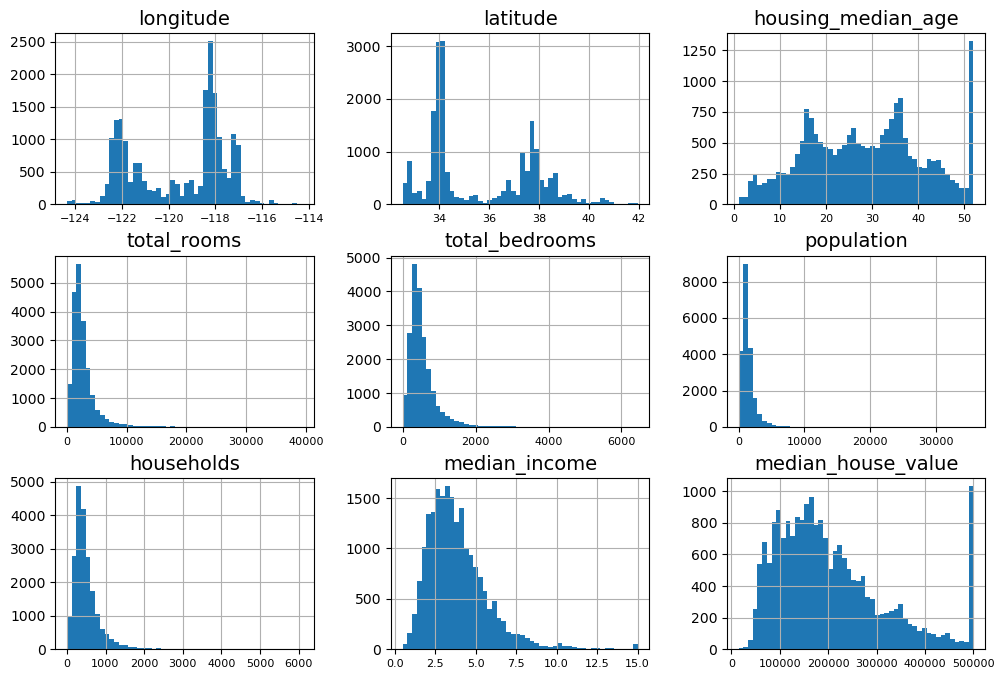

In [7]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=10, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

We have seen there are many attributes distribute skewed right, and they exteded much farther to the right of the median than to the left. This make harder for ML algorithms to detect patterns. We try to transform them more symmetrical and bell-shaped distributions.

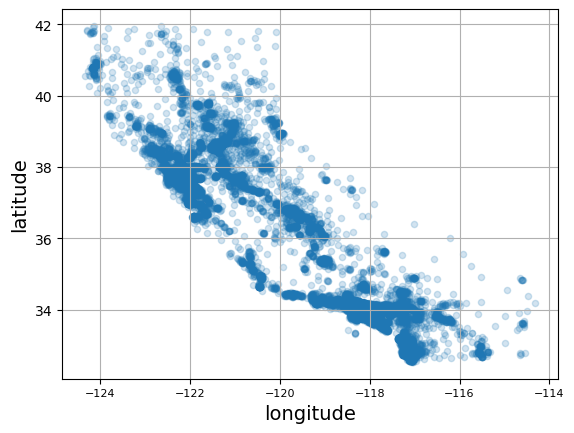

In [8]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)
plt.show()

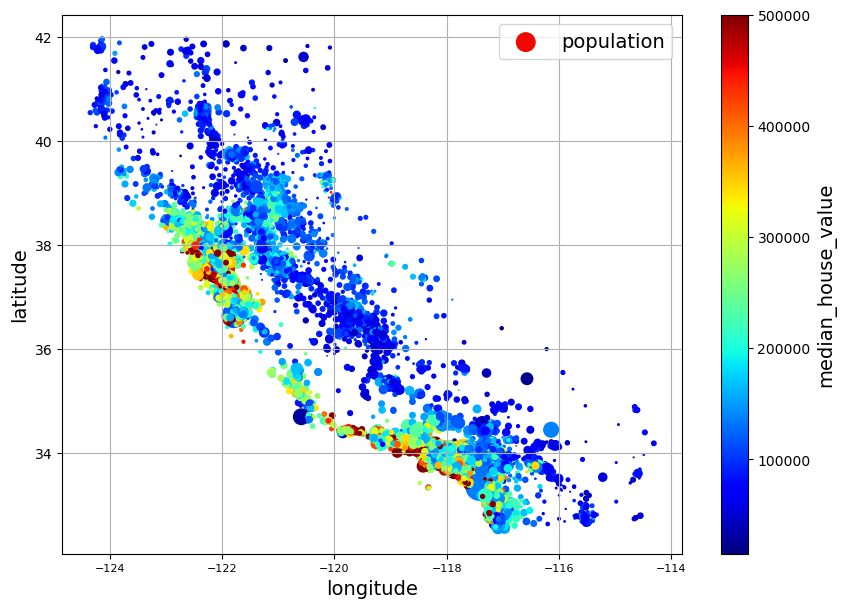

In [9]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True,
             s=housing['population']/100, label='population',
             c='median_house_value', cmap='jet', colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [10]:
IMAGE_PATH = Path() / 'images' /'c2_mlproject'
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGE_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

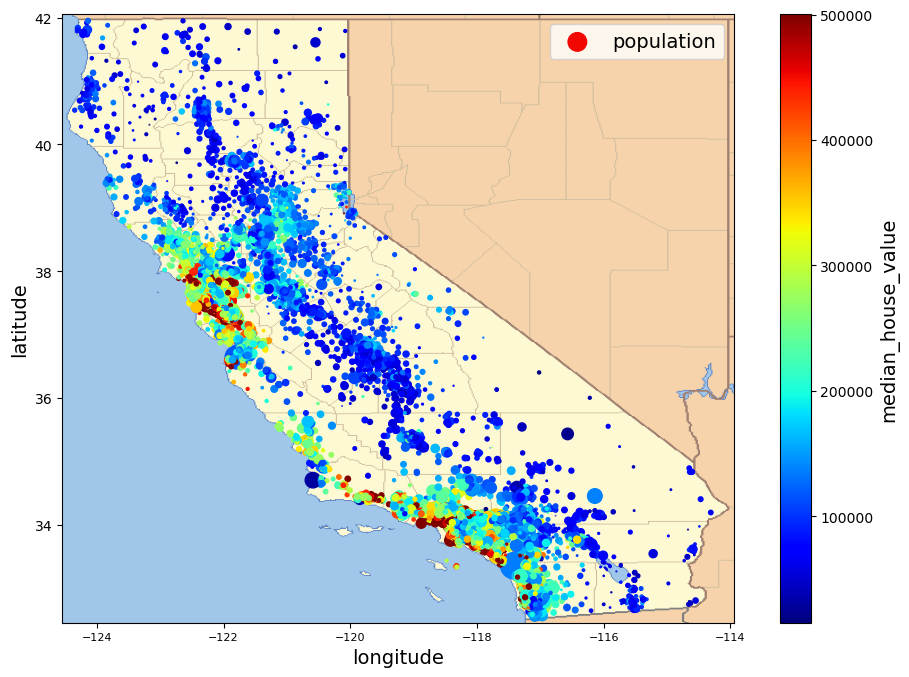

In [11]:
image = 'california.png'
if not (IMAGE_PATH / image).is_file():
    url = "https://github.com/chuongnet/mltf03/raw/main/images/c2_mlproject/" + image
    print('Downloading', image)
    urllib.request.urlretrieve(url, IMAGE_PATH / image)
    
housing.plot(kind='scatter', x='longitude', y='latitude', #alpha=0.2,
             s=housing['population'] / 100, label='population',
             c='median_house_value', cmap='jet', colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

cali_img = plt.imread(IMAGE_PATH / image)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(cali_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

## Correlations

In [12]:
housing.corr()['median_house_value'].sort_values(ascending=False) #, by='median_house_value')

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

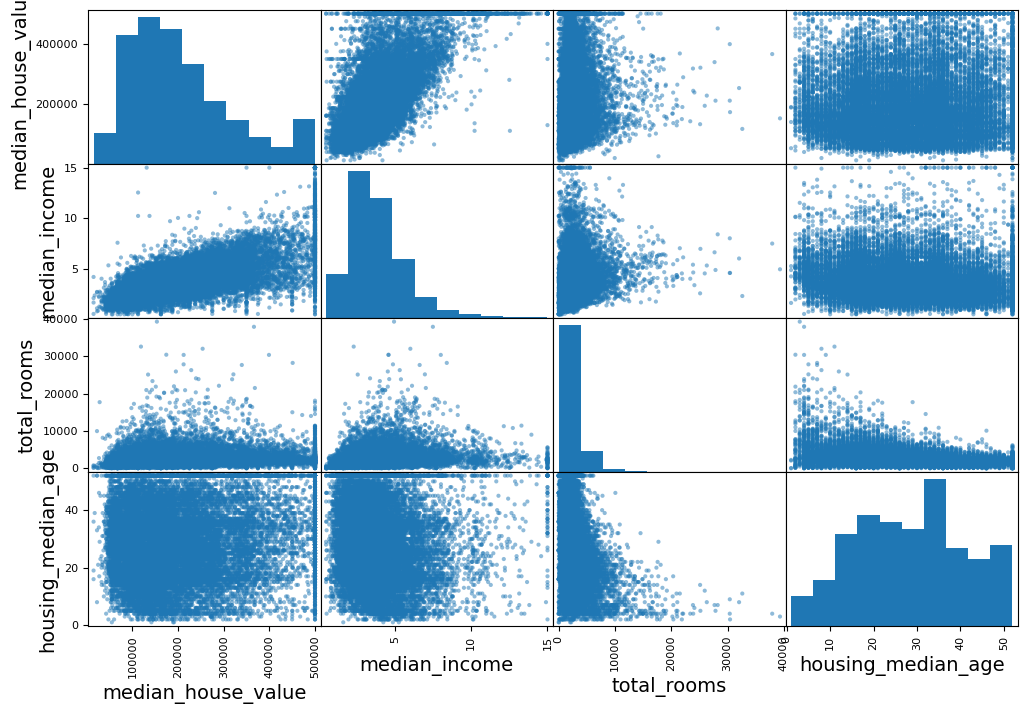

In [13]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

There is a quiet strong relationship between median_income and median_house_value. But there are few horizontal line around \\$500.000, \\$450.000, \\$350.000, and \\$280.000. We try to remove the corresponding districts to prevent the algorithms from learning to reproduce these data quirks.

The correlation coefficient is 0, that means their axes are not independent (nonlinear relationship). 

In [14]:
## make a copy of data
housing1 = housing.copy()
## adding some attributes and hope they are useful.
housing1['rooms_per_house'] = housing1['total_rooms'] / housing1['households']
housing1['bedrooms_ratio'] = housing1['total_bedrooms'] / housing1['total_rooms']
housing1['people_per_house'] = housing1['population'] / housing1['households']

In [15]:
housing1.corr()['median_house_value'].sort_values()

bedrooms_ratio       -0.255880
latitude             -0.144160
longitude            -0.045967
population           -0.024650
people_per_house     -0.023737
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
rooms_per_house       0.151948
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

#### Summ
The bedrooms_ratio is must more correlation with median_house_value than the total_bedrooms and rooms. The lower bedrooms/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district. The large houses, the more expensive they are.

## Data cleaning

In [16]:
null_rows_idx = housing.isna().any(axis=1)
null_rows_idx

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [17]:
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND


In [18]:
# housing.dropna(subset=['total_bedrooms'], inplace=True) # option 1
# housing.loc[null_rows_idx].head()

In [19]:
median1 = housing1['total_bedrooms'].median()

housing1['total_bedrooms'].fillna(median1, inplace=True)
housing1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
182,-118.27,34.04,13.0,1784.0,435.0,2158.0,682.0,1.7038,118100.0,<1H OCEAN,2.615836,NaN,3.164223
327,-117.65,34.04,15.0,3393.0,435.0,2039.0,611.0,3.9336,151000.0,INLAND,5.553191,NaN,3.337152
366,-122.50,37.75,44.0,1819.0,435.0,1137.0,354.0,3.4919,271800.0,NEAR OCEAN,5.138418,NaN,3.211864
477,-117.99,34.14,30.0,2346.0,435.0,1988.0,474.0,2.5625,153000.0,INLAND,4.949367,NaN,4.194093
495,-114.59,34.83,41.0,812.0,435.0,375.0,158.0,1.7083,48500.0,INLAND,5.139241,NaN,2.373418


## Drop outliers

In [20]:
# from sklearn.ensemble import IsolationForest
## 
# iso_forest = IsolationForest(random_state=42)
# outlier_pred = iso_forest.fit(housing)

## Handle text and categorical attributes

In [21]:
housing_cat = housing1[['ocean_proximity']]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [22]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [23]:
onehot_encoder = OneHotEncoder()
housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)

housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [24]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
## using pandas function get_dummies()
housing_cat_encoded = pd.get_dummies(housing1, columns=['ocean_proximity'])
housing_cat_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1,0


## Feature Scaling

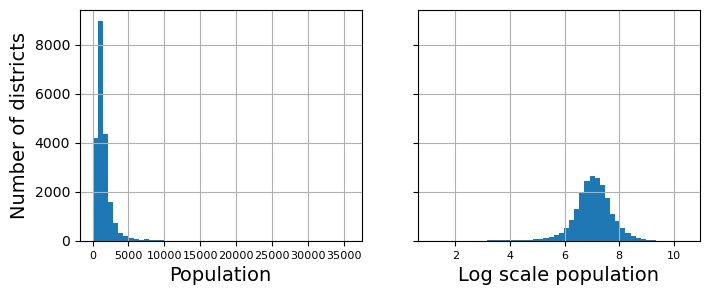

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

housing1['population'].hist(ax=axs[0], bins=50)
housing1['population'].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel('Population')
axs[1].set_xlabel('Log scale population')
axs[0].set_ylabel('Number of districts')
plt.show()

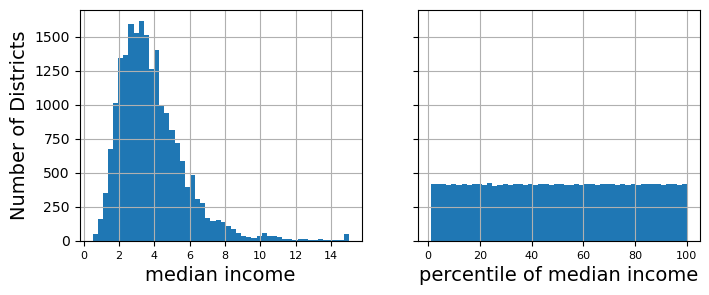

In [27]:
## Checking percentile
percentiles = [np.percentile(housing1['median_income'], p) for p in range(1, 100)]
flatten_income = pd.cut(housing1['median_income'], bins=[-np.inf] + percentiles + [np.inf], labels=range(1, 101))

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

housing1['median_income'].hist(ax=axs[0], bins=50)
flatten_income.hist(ax=axs[1], bins=50)
axs[0].set_ylabel('Number of Districts')
axs[0].set_xlabel('median income')
axs[1].set_xlabel('percentile of median income')
plt.show()

In [28]:
# using standard (normalize) scaling
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_scaled = std_scaler.fit_transform(housing_cat_encoded[:5])

In [29]:
type(housing_scaled)

numpy.ndarray

In [30]:
housing_scaled

array([[ 0.68599434,  1.88648444, -0.21529553, -0.68267033, -0.71456392,
        -0.7084169 , -0.67899553,  0.96018595,  1.97681114,  0.30205618,
        -0.5779356 ,  0.45066303,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.54348727,  0.17149859, -1.87141502,  1.98848027,  1.98091466,
         1.98704197,  1.98641748,  0.94634053, -0.25737008, -0.55730934,
        -0.09865818, -1.2788349 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.17149859, -0.68599434,  0.69557019, -0.43054532, -0.54626894,
        -0.48282294, -0.54467135,  0.33900345, -0.40932289,  1.80424815,
        -1.46690931,  1.40794705,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.02899151, -0.68599434,  0.69557019, -0.51344162, -0.42211691,
        -0.40243888, -0.43405145, -0.60010022, -0.66574327, -1.04204584,
         1.39356774,  0.42113267,  0.        ,  0.        ,  0.        ,
         0.        

In [31]:
## save a memory 
del housing1
del housing_cat_encoded
del housing_cat_1hot

#### combining everything to build up a scaling function
- SimpleImpuse() to work out for mean of every attribute
- StandardScaler() to transform values of all attributes to similar scale
- make_pipeline() to create a pipeline processing
- OnehotEncoder() to transform categorical attribute into a numeric value

In [32]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

In [34]:
housing_labels = housing['median_house_value'].copy()
housing.drop(['median_house_value'], axis=1, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [35]:
num_atts = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income']
cat_atts = ['ocean_proximity']

num_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy='median')),
    ('Standardize', StandardScaler())
     ])
    
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore'))

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_atts),
    ('category', cat_pipeline, cat_atts)
])

In [36]:
# first function in pipeline
num_pipeline[0]

SimpleImputer(strategy='median')

In [37]:
cat_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent'))])

In [38]:
num_pipeline.named_steps['Imputer']

SimpleImputer(strategy='median')

In [39]:
num_pipeline.set_params(Imputer__strategy='median')

Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
                ('Standardize', StandardScaler())])

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

## define some functions
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_name_in):
    return ['ratio'] # feature name out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

def log_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(np.log, feature_names_out='one-to-one'),
        StandardScaler())

def cluster_similarity():
    return ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())


## define a class to compute the cluster similarity
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        
    def fit(self, X, y=None, sample_weight=None):
        self.kmean_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmean_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmean_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f'Cluster {i} similarity' for i in range(self.n_clusters)]

In [41]:
preprocessing = ColumnTransformer([
    ('bedrooms', ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ('room_per_house', ratio_pipeline(), ['total_rooms', 'households']),
    ('people_per_house', ratio_pipeline(), ['population', 'households']),
    ('log', log_pipeline(), ['total_bedrooms', 'total_rooms', 'population', 'households', 'median_income']),
    ('geo', cluster_similarity(), ['longitude', 'latitude']),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object)),
], remainder=default_num_pipeline)

In [42]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(20640, 24)

In [43]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'room_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Training Model

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
X_train, X_test, y_train, y_test = train_test_split(housing, housing_labels.values, test_size=0.1, random_state=42, shuffle=False)
X_train.shape, y_train.shape

((18576, 9), (18576,))

In [46]:
# views cross score
def show_cross_val_score(X, y, model=None, scoring='neg_root_mean_squared_error', cv=10):
    if model is None:
        print('Model is not none')
        return
    else:
        return -cross_val_score(model, X, y, scoring=scoring, cv=cv)

In [47]:
# training with LinearRegression
linear_reg = make_pipeline(preprocessing, LinearRegression())
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [48]:
linear_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_rmse

69120.57464522768

In [49]:
# training with DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

In [50]:
tree_rmse = mean_squared_error(y_test, y_pred, squared=False)
tree_rmse

68248.20411175412

In [51]:
y_test[:5], y_pred[:5]

(array([289600., 118700., 225000., 265900.,  64400.]),
 array([322200., 120100., 123600., 280000.,  79800.]))

In [52]:
lin_rmses = show_cross_val_score(X_test, y_test, model=linear_reg)
pd.Series(lin_rmses).describe()

count       10.000000
mean     68607.730911
std       6858.830027
min      56705.740145
25%      65842.508021
50%      68711.606152
75%      70324.452481
max      84083.632580
dtype: float64

In [53]:
lin_rmses.shape

(10,)

In [54]:
tree_rmses = show_cross_val_score(X_test, y_test, model=tree_reg)
pd.Series(tree_rmses).describe()

count       10.000000
mean     76951.864193
std       9142.168502
min      67725.407173
25%      70193.847388
50%      73073.119695
75%      82825.894924
max      92642.546309
dtype: float64

In [55]:
X_test.shape

(2064, 9)

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

In [56]:
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

In [57]:
forest_rmses = show_cross_val_score(X_train, y_train, model=forest_reg) 

In [58]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     46841.375382
std       2190.298953
min      44335.843706
25%      44856.799868
50%      46572.460886
75%      48526.019220
max      50195.720797
dtype: float64

In [59]:
forest_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f6...
                                                  ClusterSimilarity(random_state=42),
                                                  ['longitude', 'latitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6cbbcb26a0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [61]:
y_pred = forest_reg.predict(X_test)

In [82]:
forest_reg.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f6...
                                                  ClusterSimilarity(random_state=42),
             

In [83]:
forest_reg.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                SimpleImputer(strategy='median')),
                                               ('standardscaler',
                                                StandardScaler())]),
                     transformers=[('bedrooms',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('functiontransformer',
                                                     FunctionTransformer(feature_names_out=<function ratio_name at 0x7f6cbbc2c0d0>,
                                                                         func=<function column_ratio...
                                    ['total_bedrooms', 'total_rooms', 'population',
                                     'households', 'median_income

In [62]:
forest_rmse = mean_squared_error(y_test, y_pred, squared=False)
forest_rmse

47118.57526040146

# Fine Tune the Model
### Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

params = [
    {'preprocessing__geo__n_clusters' : [5, 8, 10], 'random_forest__max_features' : [4, 6, 8]},
    {'preprocessing__geo__n_clusters' : [10, 15], 'random_forest__max_features' : [6, 8, 10]}    
]

grid_search = GridSearchCV(full_pipeline, params, cv=3, scoring='neg_root_mean_squared_error')

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f6cbbcb26a0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [65]:
## get the best estimate parameters
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [66]:
## the best estimator for model
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f6cbbc...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['longitude', 'latitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6c7cbcc0a0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [68]:
## the score estimator
grid_search.best_score_

-43745.64794425143

In [69]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.160051,0.048260,0.100314,0.000452,5,4,"{'preprocessing__geo__n_clusters': 5, 'random_...",-49204.453093,-47389.028234,-46381.327827,-47658.269718,1168.154470,14
1,2.989642,0.037851,0.100671,0.001048,5,6,"{'preprocessing__geo__n_clusters': 5, 'random_...",-48791.651171,-47425.023278,-46351.125763,-47522.600071,998.726519,13
2,3.849732,0.011350,0.102788,0.003626,5,8,"{'preprocessing__geo__n_clusters': 5, 'random_...",-48784.029047,-47468.238675,-46922.059624,-47724.775782,781.490456,15
3,2.202498,0.013061,0.100405,0.000150,8,4,"{'preprocessing__geo__n_clusters': 8, 'random_...",-47314.198975,-45078.807942,-44322.130501,-45571.712473,1270.258398,10
4,3.038130,0.002132,0.099953,0.000263,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-47135.722738,-44711.838973,-44273.711063,-45373.757591,1258.671231,9
5,3.917187,0.025947,0.099787,0.000605,8,8,"{'preprocessing__geo__n_clusters': 8, 'random_...",-47501.172858,-45370.062124,-44759.620049,-45876.951677,1175.225004,12
6,2.214071,0.008541,0.099859,0.000257,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-47277.140531,-44736.446829,-43427.110540,-45146.899300,1598.340005,6
7,3.045512,0.010714,0.099948,0.000316,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-46842.359005,-44387.479902,-43482.264104,-44904.034337,1419.549412,4
8,3.874431,0.012817,0.099924,0.000240,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-46843.057974,-45163.990544,-44006.848099,-45337.965539,1164.394574,7
9,3.076804,0.017104,0.099809,0.000348,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-46842.359005,-44387.479902,-43482.264104,-44904.034337,1419.549412,4


In [70]:
cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
drop_cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params',
             'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_test_score', 'rank_test_score']
cv_res.drop(drop_cols, axis=1, inplace=True)
cv_res.head()

,param_preprocessing__geo__n_clusters,param_random_forest__max_features,mean_test_score
12,15,6,-43745.647944
13,15,8,-44288.068806
14,15,10,-44538.772574
7,10,6,-44904.034337
9,10,6,-44904.034337


In [73]:
final_model = grid_search.best_estimator_ # include preprocessing

In [74]:
y_pred = final_model.predict(X_test)

In [75]:
mean_squared_error(y_test, y_pred, squared=False)

43045.4331786614

The final_model error (43045.433) is little bit better than the forest_reg model (47118.575)

## Compute 95% confidence interval for the test RMSE

In [76]:
from scipy import stats

confidence = .95
squared_errors = (y_pred - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([40249.79896097, 45670.25638946])

In [77]:
## compute t_test manually
m = len(squared_errors)
mean = squared_errors.mean()
t_score = stats.t.ppf((1 + confidence) / 2, df=m-1)
t_margin = t_score * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - t_margin), np.sqrt(mean + t_margin)

(40249.7989609696, 45670.256389457)

In [78]:
## compute the z_test
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(40251.49607209325, 45668.760647027295)

In [79]:
import joblib

joblib.dump(final_model, 'my_housing_prediction_model.pkl')

['my_housing_prediction_model.pkl']

In [80]:
## to deploy the model 
my_model_loaded = joblib.load('my_housing_prediction_model.pkl')
new_data = housing.iloc[:5]
predictions = my_model_loaded.predict(new_data)

In [81]:
mean_squared_error(housing_labels.iloc[:5].values, predictions, squared=False)

21104.177599727493

## notes
#### 1. Feature scaling and transformation
- Neutral network work best with zero mean input, so a range -1 to 1 is preferable, MinMax scaling (normalization) with ```feature_range=(-1, 1)```
- When the feature's distribution has a heavy tail (values far from the mean). Before scaling the feature, we need to transform it to shrink (small gap) the heavy tail, make the distribution more symmatric (aka, bell-curve). If the feature have very long or heavy tail, such as power law distribution, then replace the feature with it logarithm may help.
- A feature has a multimodal distribution (i.e. two or more peaks, called modes). Apply the Similarity (Clusters) measure to this feature.
#### 2. Select and Train a Model
- Most median house value range between 120.000 to 265.000 USD, so the typical prediction error of 68.628 USD is really not satisfying. This model is ```Underfitting``` the training data. So, that features are not good enough to provide power information or the model is not powerful to predict. To fix this, choose another good model or feed the training algorithm with better features, or reduce the constraints on the model.
#### 3. Evaluation using Cross-Validation
- The ```cross-validation``` function expects a utility function (greater is better) rather than a ```cost function``` (lower is better). So the score is actually the opposite of the RMSE. It's negative value
#### 4. Fine-Tune Model
- We can refer to any hyperparameter of any estimator in pipeline, even in nested deep inside several pipeline and column tranformers